# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

## import modules

In [115]:
import pandas as pd
import numpy as np
import pylab

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## prepare data

### get data

In [124]:
dataset = '../data/feelingOld.csv'

# load data as pandas data frame
age_df=pd.read_csv(dataset)

age_df

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
0,"Yes, I am at least 18 years of age, have read ...",4,55,80,21,female,0
1,"Yes, I am at least 18 years of age, have read ...",5,40,50,39,female,5
2,"Yes, I am at least 18 years of age, have read ...",5,40,70,21,female,0
3,"Yes, I am at least 18 years of age, have read ...",2,40,60,36,female,1
4,"Yes, I am at least 18 years of age, have read ...",5,50,112,46,male,0
5,"Yes, I am at least 18 years of age, have read ...",5,40,60,47,Male,2
6,"Yes, I am at least 18 years of age, have read ...",5,30,90,29,female,0
7,"Yes, I am at least 18 years of age, have read ...",1,40,50,35,female,0
8,"Yes, I am at least 18 years of age, have read ...",5,30,50,33,male,0
9,"Yes, I am at least 18 years of age, have read ...",3,50,75,41,male,2


### clean up

drop column with consent as it is irrelevant for data exploration

In [125]:
age_df=age_df.drop(['Consent'],axis=1)

recode gender as it contains different typings

In [126]:
# check for all entries in gender to find string to compare
age_df['gender'].unique()

array(['female', 'male', 'Male', 'Female', 'FEMALE', 'MALE', 'mael',
       'Femail', 'Female ', 'Male '], dtype=object)

In [127]:
# make empty list
gender_new=[]

# fill gender with new names for gender
for i in age_df.index:
    if 'fema' in age_df['gender'][i].lower():
        gender_new.append('female')
    else:
        gender_new.append('male')
        
    print(age_df['gender'][i],gender_new[i]) # to check if everything works well

# replace old gender variable by new gender names from list
age_df['gender']=gender_new

female female
female female
female female
female female
male male
Male male
female female
female female
male male
male male
female female
Male male
female female
Female female
Male male
male male
female female
Male male
male male
Female female
male male
male male
Male male
male male
Male male
female female
Male male
male male
Male male
FEMALE female
male male
Male male
Male male
female female
Female female
female female
male male
female female
Male male
female female
male male
female female
Male male
Male male
male male
female female
Male male
Female female
Female female
male male
female female
Male male
female female
male male
female female
male male
Male male
Male male
male male
Male male
Male male
female female
female female
male male
male male
female female
Female female
Male male
female female
female female
female female
Male male
female female
female female
Female female
male male
Female female
Male male
Female female
male male
Male male
male male
Male male
male male
male male
MA

In [128]:
age_df

,ageFeel,oldBegin,oldReally,age,gender,numChild
0,4,55,80,21,female,0
1,5,40,50,39,female,5
2,5,40,70,21,female,0
3,2,40,60,36,female,1
4,5,50,112,46,male,0
5,5,40,60,47,male,2
6,5,30,90,29,female,0
7,1,40,50,35,female,0
8,5,30,50,33,male,0
9,3,50,75,41,male,2


## describe our data set

In [129]:
age_df.describe()

,ageFeel,oldBegin,oldReally,age,numChild
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,4.025641,48.128205,67.887179,36.805128,0.933333
std,1.237040,12.600891,14.348303,12.116402,1.188721
min,1.000000,20.000000,18.000000,20.000000,0.000000
25%,3.000000,40.000000,60.000000,28.000000,0.000000
50%,4.000000,50.000000,70.000000,33.000000,0.000000
75%,5.000000,60.000000,80.000000,43.500000,2.000000
max,7.000000,80.000000,112.000000,79.000000,5.000000


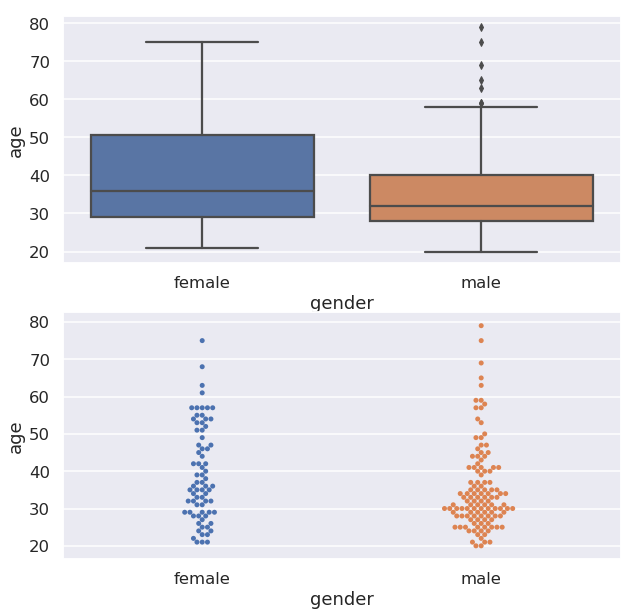

In [130]:
fig,ax = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(data=age_df,
           y='age',x='gender',
           dodge=True,
           ax=ax[0])
sns.swarmplot(data=age_df,
           y='age',x='gender',
           dodge=True,
           ax=ax[1])

## plotting age distributions for each gender

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


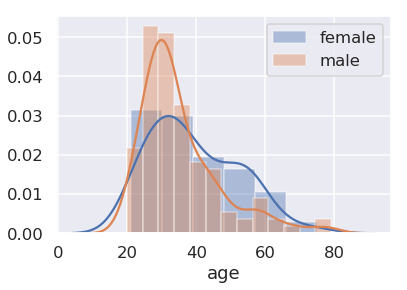

In [131]:
# for each possible entry in gender...
for gender in np.unique(age_df.loc[:,'gender']):
    # take age for this gender
    gender_df = age_df[age_df.loc[:,'gender']==gender]
    # and plot it in a distribution plot
    sns.distplot(gender_df.loc[:,'age'],label=gender)
plt.legend()
plt.show()

## plot correlation of real age and perceived beginning of being old

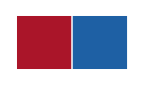

In [132]:
my_palette = sns.color_palette('RdBu',10)
my_palette = (my_palette[0],my_palette[-1])
sns.palplot(my_palette)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


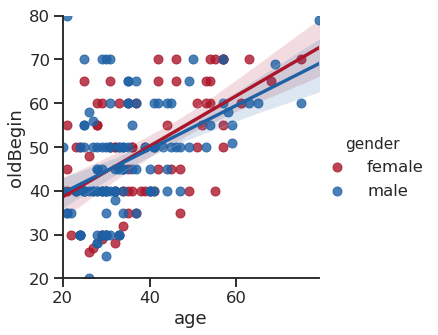

In [133]:
sns.set_style(style='ticks')

sns.lmplot(data=age_df,x='age',
           y='oldBegin',
           scatter=True,
           fit_reg=True,
           palette=my_palette,
           hue='gender')
plt.xlim(min(age_df['age']),max(age_df['age']))
plt.ylim(min(age_df['oldBegin']),max(age_df['oldBegin']))

# save figure as picture
pylab.savefig('fig_age-oldBegin.png')

## Do children change the perception of being old?

Recode children binary

In [136]:
def recode_child(df):
    
    copy_df = df.copy()
    child = []
    
    for entry in copy_df['numChild']:
        if entry > 0:
            child.append('yes')
        else:
            child.append('no')
    
    copy_df['child'] = child
    
    #copy_df.index(copy_df['child'])
    
    return copy_df


In [144]:
child_df = recode_child(age_df)

child_df.index = [child_df.loc[:,'child'],child_df.index ]
child_df.sort_index(inplace=True)


In [159]:
child_df

ageFeel  oldBegin  oldReally  age  gender  numChild child
child                                                               
no    0          4        55         80   21  female         0    no
      2          5        40         70   21  female         0    no
      4          5        50        112   46    male         0    no
      6          5        30         90   29  female         0    no
      7          1        40         50   35  female         0    no
      8          5        30         50   33    male         0    no
      11         5        55         65   25    male         0    no
      12         6        55         75   28  female         0    no
      13         3        65         75   25  female         0    no
      14         3        45         70   32    male         0    no
      17         3        40         60   32    male         0    no
      18         5        30         50   24    male         0    no
      20         2        55         70   59    male         0    no
      21         3        40         60   34    male         0    no
      22         5        40         60   25    male         0    no
      23         3        38         77   32    male         0    no
      24         5        50         70   27    male         0    no
      26         3        50         80   20    male         0    no
      28         3        40         80   27    male         0    no
      29         4        70         80   42  female         0    no
      30         3        50         75   34    male         0    no
      31         6        65         75   35    male         0    no
      32         3        70         90   29    male         0    no
      33         4        50         65   24  female         0    no
      34         3        30         40   22  female         0    no
      36         3        30         70   24    male         0    no
      37         6        45         60   42  female         0    no
      39         5        60         80   28  female         0    no
      44         5        51         81   59    male         0    no
      49         3        40         70   44    male         0    no
...            ...       ...        ...  ...     ...       ...   ...
yes   136        5        40         60   55  female         3   yes
      137        5        50         80   51  female         2   yes
      141        5        30         30   30    male         1   yes
      143        5        40         60   41  female         3   yes
      146        5        60         80   29  female         3   yes
      149        5        20         22   26    male         1   yes
      150        5        55         75   57  female         1   yes
      151        3        60         80   37  female         2   yes
      154        5        30         45   33  female         2   yes
      155        5        40         70   34  female         4   yes
      157        3        50         75   39  female         2   yes
      159        5        58         75   58    male         2   yes
      160        6        60         70   61  female         3   yes
      161        6        60         70   65    male         3   yes
      162        4        60         80   35  female         3   yes
      166        7        26         26   26  female         1   yes
      167        2        40         50   28    male         2   yes
      177        3        65         75   42  female         2   yes
      178        5        50         70   35    male         2   yes
      179        3        60         70   45    male         3   yes
      181        2        45         60   28    male         1   yes
      182        4        45         65   34    male         2   yes
      183        6        29         65   29  female         1   yes
      186        5        60         80   75    male         2   yes
      187        5        60         80   37    male         2   yes
      188

In [175]:
T_child = stats.ttest_ind(child_df.loc['yes']['oldBegin'],child_df.loc['no']['oldBegin'])

T_child[-1]

0.09113631501736665

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<module 'matplotlib.pyplot' from '/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/matplotlib/pyplot.py'>

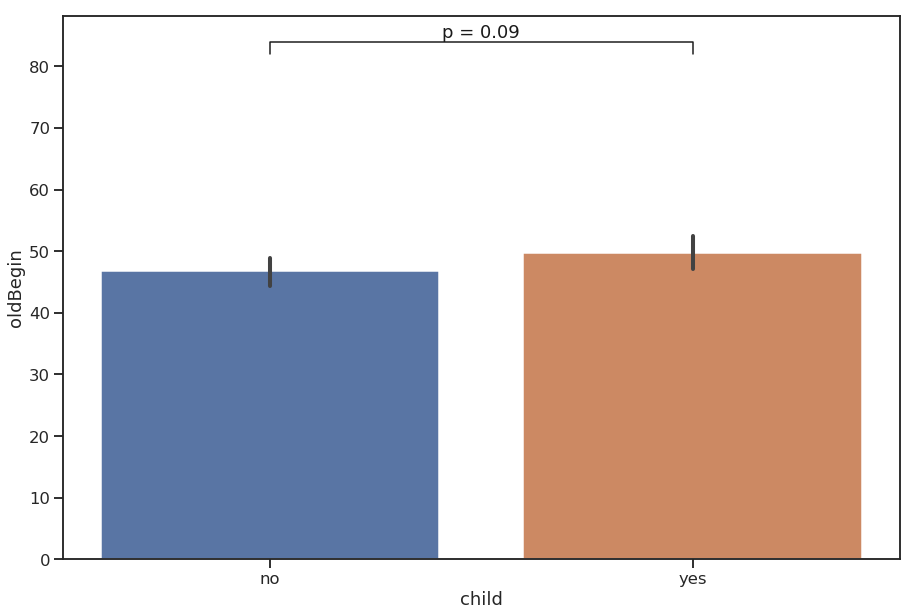

In [186]:
plt.figure(figsize = (15,10))

sns.barplot(data=child_df,
           x='child',y='oldBegin')

def f(df,var_name,x1,x2,text):
    #x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = df[var_name].max() + 2, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, text, ha='center', va='bottom', color=col)

    return plt

text = 'p = %.2f'%T_child[-1]
f(child_df,'oldBegin',0,1,text)
